<a href="https://colab.research.google.com/github/BhaskarBiswas/GoogleColabNotebooks/blob/main/Riemann_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Alternative Formulation of the Riemann Hypothesis
### - Ashwin Rao, Stanford University

You are likely here because you've heard that the [Riemann Hypothesis](https://wikipedia.org/wiki/Riemann_hypothesis) (henceforth abbreviated as RH) is the most important unsolved problem in Mathematics and the practical ramifications of a proof (or disproof) of RH could be immense for technology (and consequently, society).

However, those of you who don't have an advanced Mathematics background are likely to find the usual explanations of what RH is (on blog posts and on youtube) too technical, opaque and perhaps too boring. So I've put together this short notebook to show an alternative (i.e., equivalent) formulation of RH that is much easier to understand and very simple to code and visualize.

This *alternative formulation* of RH is a statement (call it S) that is technically equivalent to the classical formulation of RH (that involves the non-trivial roots of the Riemann Zeta function). By *equivalent*, we mean that if S is true, then the classical formulation of RH is true, and if the classical formulation of RH is true, then S is true.

Unlike the classical formulation of RH that requires a somewhat difficult and unintuitive tutorial on the Riemann Zeta function (and consequently, complex analysis), understanding this *alternative formulation* of RH (i.e., statement S) only requires a background in basic high-school Mathematics. 

So, here is the Statement S (i.e., the alternative formulation of RH):

---
Define the Harmonic-Number function $H$ for all integers $n > 1$ as the sum of reciprocals of integers from 1 to n, i.e.,
$$H(n) = \sum_{1\leq i \leq n} \frac 1 i$$

Define the Sum-Of-Divisors function $\sigma$ for all integers $n > 1$ as the sum of all divisors of n (including 1 and n itself), i.e.,
$$\sigma(n) = \sum_{1 \leq i \leq n; i|n} i$$

Then for all integers $n > 1$,

$$\sigma(n) < H(n) + e^{H(n)} \cdot \log_e({H(n)})$$

---

If you are intersted in the proof of the equivalence of this Statement S with the classical formulation of RH, [see this short paper](https://dept.math.lsa.umich.edu/~lagarias//doc/elementaryrh.pdf).

However, our goal here is to not get into advanced proofs regarding RH, rather it is to make intuitive sense of this alternative formulation. The best way to do this is to write some code to calculate the two sides of the inequality of Statement S above for various values of $n$ and plot it to develop some intuition on the two quantities being compared. Note that in the code below we extend the functions $H$ and $\sigma$ to the case of $n=1$, in which case, equality holds (i.e., $H(1) = \sigma(1) = 1$).

Vary the variable `num` (range of values for $n$) in the code below from a small value to a large value to visualize this alternative formulation of RH.

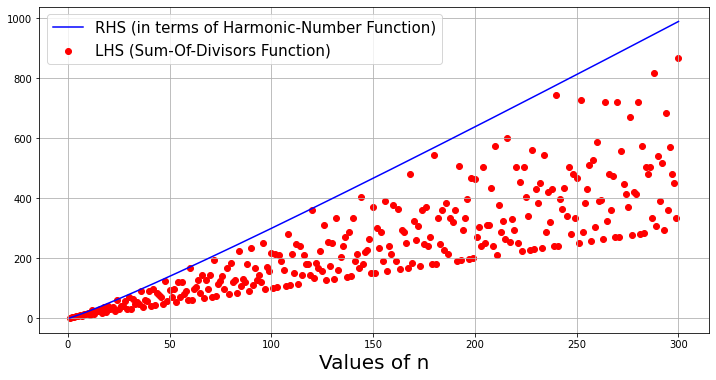

In [ ]:
import math
def rh(num):
    ret = [(1, 1.0, 1.0)]
    x = 1.0
    for n in range(2, num + 1):
        x += 1 / n
        ret.append(
            (
                n,
                1 + n + sum(i for i in range(2, int(n / 2) + 1) if n % i == 0),
                x + math.exp(x) * math.log(x)
            )
        )
    return ret

import matplotlib.pyplot as plt
num = 300
index, lhs, rhs = zip(*rh(num))
plt.figure(figsize=(12,6))
plt.scatter(index, lhs, c="r", label="LHS (Sum-Of-Divisors Function)")
plt.plot(index, rhs, c="b", label="RHS (in terms of Harmonic-Number Function)")
plt.xlabel("Values of n", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.show()

## Making sense of this Alternative Formulation of RH

Now let's understand what's going on in this graph. Define function $\alpha$ for all integers n > 1 as:
$$\alpha(n) = H(n) + e^{H(n)} \cdot \log_e(H(n))$$

Therefore, we can write our alternative formulation of RH as:
$$\sigma(n) < \alpha(n) \text{ for all integers } n > 1$$

The blue curve above looks like a straight line, but it is not - it has a slight positive curvature. RH analysis considers the slope of this blue curve as $n$ grows. Specifically, we consider the ratio $\frac {\alpha(n)} n$. As you can see in the graph, this ratio is about 3 when $n$ is about $100$ and this ratio grows gradually to about 6 when $n$ gets to about $10^{15}$.

Likewise, we consider the ratio $\frac {\sigma(n)} n$. Unlike $\frac {\alpha(n)} n$, the ratio $\frac {\sigma(n)} n$ is not monotonically increasing. It fluctuates considerably as seen by the red dots in the graph. The lowest red dots in the fluctuation correspond to prime $n$. Since $\frac {\sigma(n)} n = 1 + \frac 1 n \approx 1$ for large prime $n$, the lowest red dots can be connected by an *almost straight line* of slope 1. On the other hand, the highest red dots in the fluctuation are for the *most composite* $n$, i.e., those with many factors. If we consider the ratio $\frac {\sigma(n)} n$ for the most composite $n$ (as $n$ grows), we find that the growth of this ratio pretty much tracks the growth of the ratio $\frac {\alpha(n)} n$ (about 3 when $n$ is about $100$ and gradually growing to about 6 when $n$ gets to about $10^{15}$). 

Even though $\frac {\sigma(n)} n$ is *perpetually threatening* to surpass $\frac {\alpha(n)} n$ as $n$ grows, we find that it actually never surpasses $\frac {\alpha(n)} n$, not even for a single value of $n$. This inability to surpass is the statement of this alternative formulation of RH.

## So what's the Big Deal?

This alternative formulation of RH is interesting because it links integer divisibility to the sum of integer reciprocals, and the linkage involves the sacred number e. More broadly, RH points to a connection between discrete mathematics (factorization, hence prime numbers, in particular) and continuous mathematics/analysis. Indeed, RH experts (which I am not!) have plenty of profound things to say about RH (which I won't cover here, but shall point you to [this article](http://www.integralworld.net/collins18.html)).

However, I do want to highlight one significant thing about RH. It is the fact that RH is related to the frequency of occurrence of prime numbers. Specifically, RH is a statement bounding this frequency with a neat formula (involving the sacred number e). The deep interest in RH is due to our fundamental desire to explore structures governing the occurrence of prime numbers. In fact, [Bernhard Riemann](https://en.wikipedia.org/wiki/Bernhard_Riemann) himself originally postulated his hypothesis with the same motivation.

Let's formalize the notion of "frequency of occurrence of prime number". We define a function $\pi$ for integers $n > 1$ as follows:

$\pi(n)$ is equal to the count of prime numbers $p$ such that $1 < p \leq n$. 

In the late 18th century (well before Riemann), Gauss and Legendre conjectured that $\pi(n)$ is approximately $\frac n {\log_e (n)}$ in the sense that:

$$\lim_{n \rightarrow \infty} \frac {\pi(n) \cdot \log_e (n)} {n} = 1$$

This conjecture of Gauss & Legendre was proved in the late 19th century and formalized as the *Prime Number Theorem*. The proof involved usage of an important function created by Riemann (known as the Zeta function) - in fact, the classical formulation of RH is in terms of Riemann's Zeta function. We won't get into the Zeta function here, but we brought up the Prime Number Theorem because one can show that RH is equivalent to the fact that $\pi(n)$ is well-approximated by $\frac n {\log_e (n)}$. In plain English, this says that **the frequency of occurrence of prime numbers can be well-approximated by a simple formula involving the natural logarithm**.

